# Scalability Model (Storage Targets)

__28/06/2021__

## Storage Targets Test #07

- 8 computing nodes
- 8 clients (processes) per node.
- 7 storage targets.

In [1]:
# import sys  
# sys.path.insert(0, '/home/luan/Devel/luan-teylo/code/')

# from commons import csv, charts
# import pandas as pd

# dfa = csv.load_ior('csv/old/output.csv')
# dft = cmm.load_tracker_csv('csv/old/tracker.csv')

# # Create a new dataframe with the targets and the bandwidth
# columns  = ['target1', 'target2', 'target3', 'target4', 'target5', 'target6', 'target7']

# df = pd.DataFrame()
# df['bw'] = dfa['bw']
# df['targets'] = dft['targets']
# df['start'] = dfa['start']

# df[columns] = dft[columns]

# charts.bw_single_histogram(df, bins=20)
# print(f"Mean Bandwidth: {df['bw'].mean(): .2f} +/- {df['bw'].std(): .2f}")

# # Group storage targets to see how the allocation affects the BW
# grouped = df.groupby(columns).agg({'bw': ['count', 'mean', 'min', 'max']})

# # grouped_multiple.columns = ['bw_mean', 'bw_min', 'bw_max']
# grouped = grouped.reset_index()
# grouped

# re-execution

__15/07/2021__

In [2]:
import sys  
sys.path.insert(0, '/home/luan/Devel/luan-teylo/code/')

from commons import csv, charts
import pandas as pd
dfa = csv.load_ior('csv/output2.csv')
dft = cmm.load_tracker_csv('csv/tracker.csv')
n_targets=7

In [3]:
t0 = dft['ctime'][0]
dft['ctime'] = dft['ctime'].apply(lambda x: (x - t0))

In [4]:
# Create a new dataframe with the targets and the bandwidth
columns  = ['target1', 'target2', 'target3', 'target4', 'target5', 'target6', 'target7', 'ctime']

df = pd.DataFrame()
df['bw'] = dfa['bw']
df['start'] = dfa['start']
df['end'] = dfa['end']
df['targets'] = dft['targets']
df[columns] = dft[columns]

In [5]:
dk = df[:]

x = dk['ctime'].values.reshape((-1, 1))
y = dk['bw'].values.reshape((-1, 1))

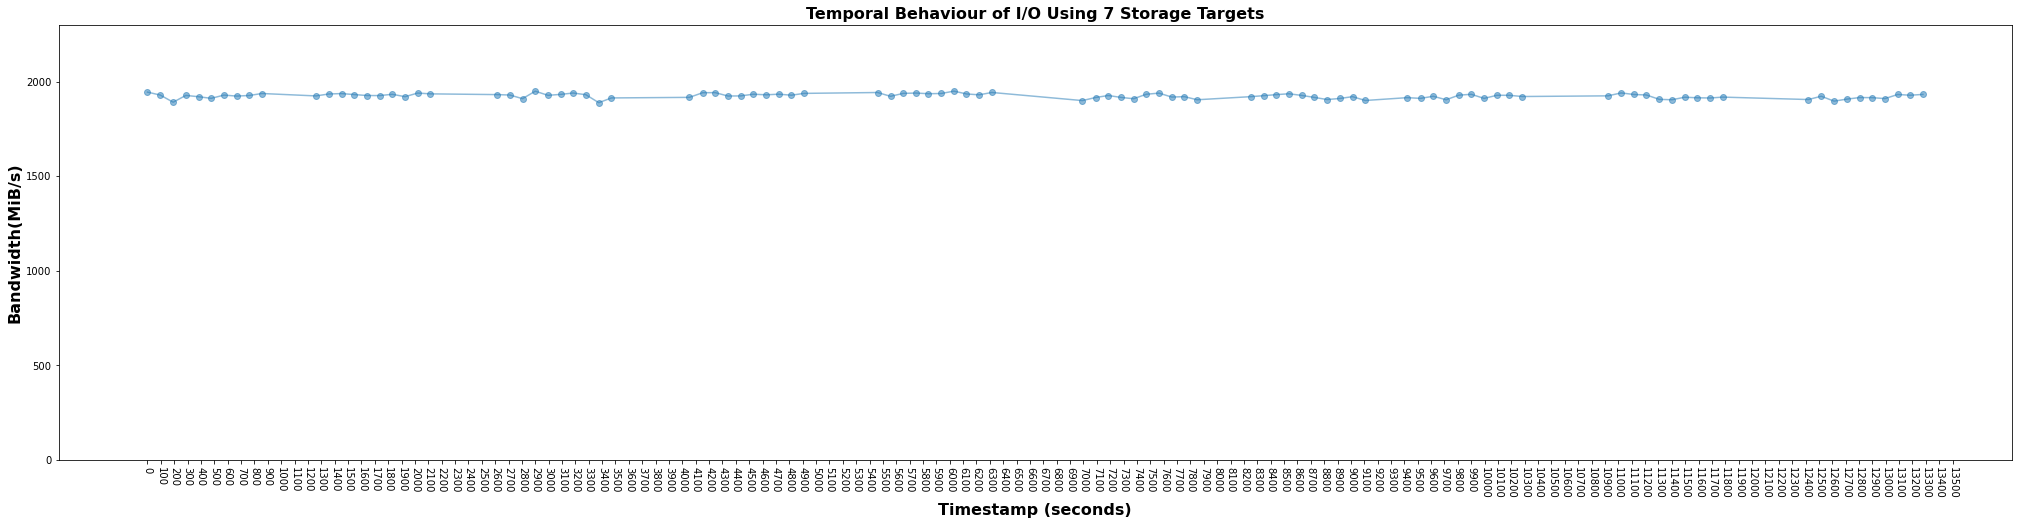

In [6]:
# %matplotlib notebook
from commons import csv, charts
from numpy import array, linspace
import numpy as np
import matplotlib.pyplot as plt
import math


fig, ax = plt.subplots()

fig.set_size_inches(35.0, 8, forward=True)

plt.plot(x, y, 'o-', alpha=0.5)

plt.xticks(range(0, 13600, 100))
plt.xticks(rotation=-90)

plt.ylabel('Bandwidth(MiB/s)',fontweight ='bold', fontsize=16)
plt.xlabel('Timestamp (seconds)', fontweight ='bold', fontsize=16)
plt.title(f"Temporal Behaviour of I/O Using {n_targets} Storage Targets", fontweight ='bold', fontsize=16)

# plt.rcParams["figure.figsize"] = [35.0, 8.0]
# plt.rcParams["figure.autolayout"] = True


plt.ylim([0, 2300])

# plt.grid()
# fig.savefig(f'../graph/{n_targets}st.pdf', format='pdf', dpi=1200)  

plt.show()

In [7]:
g_columns = ['target1', 'target2', 'target3', 'target4', 'target5', 'target6', 'target7']
gb = df.groupby(g_columns).agg({'bw': ['count','mean', 'min', 'max']})
gb.columns = ['bw_count','bw_mean', 'bw_min', 'bw_max']
gb = gb.reset_index()
gb

target1 target2 target3 target4 target5 target6 target7  bw_count  \
0     101     102     103     104     201     202     203        28   
1     101     102     103     104     201     202     204        27   
2     101     102     103     104     201     203     204         4   
3     101     102     103     104     202     203     204         4   
4     101     102     103     201     202     203     204         3   
5     101     102     104     201     202     203     204         2   
6     102     103     104     201     202     203     204        32   

       bw_mean   bw_min   bw_max  
0  1925.256786  1891.85  1950.26  
1  1927.724815  1897.49  1950.45  
2  1922.927500  1910.92  1939.93  
3  1935.650000  1923.05  1945.31  
4  1929.863333  1916.64  1938.64  
5  1934.665000  1929.00  1940.33  
6  1920.560000  1889.40  1938.57

In [8]:
# fig, ax =plt.subplots()
# fig.set_size_inches(35.0, 8, forward=True)
# ax.axis('tight')
# ax.axis('off')

# the_table = ax.table(cellText=gb.values,colLabels=gb.columns,loc='center')
# plt.title('Groups using 7 Storage Targets', size=16, fontweight ='bold')


# from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages("../graph/table_7.pdf")
# pp.savefig(fig, bbox_inches='tight')
# pp.close()

In [9]:
df0 = df.loc[(df['target1'] == '101') & (df['target2'] == '102') & (df['target3'] == '103') &
             (df['target4'] == '104') & (df['target5'] == '201') & (df['target6'] == '202') &
             (df['target7'] == '203')]

df1 = df.loc[(df['target1'] == '101') & (df['target2'] == '102') & (df['target3'] == '103') &
             (df['target4'] == '104') & (df['target5'] == '201') & (df['target6'] == '202') &
             (df['target7'] == '204')]


df2 = df.loc[(df['target1'] == '101') & (df['target2'] == '102') & (df['target3'] == '103') &
             (df['target4'] == '104') & (df['target5'] == '201') & (df['target6'] == '203') &
             (df['target7'] == '204')]

df3 = df.loc[(df['target1'] == '101') & (df['target2'] == '102') & (df['target3'] == '103') &
             (df['target4'] == '104') & (df['target5'] == '202') & (df['target6'] == '203') &
             (df['target7'] == '204')]

df4 = df.loc[(df['target1'] == '101') & (df['target2'] == '102') & (df['target3'] == '103') &
             (df['target4'] == '201') & (df['target5'] == '202') & (df['target6'] == '203') &
             (df['target7'] == '204')]

df5 = df.loc[(df['target1'] == '101') & (df['target2'] == '102') & (df['target3'] == '104') &
             (df['target4'] == '201') & (df['target5'] == '202') & (df['target6'] == '203') &
             (df['target7'] == '204')]

df6 = df.loc[(df['target1'] == '102') & (df['target2'] == '103') & (df['target3'] == '104') &
             (df['target4'] == '201') & (df['target5'] == '202') & (df['target6'] == '203') &
             (df['target7'] == '204')]




__22/07/2021__

# Generating the boxplot graph

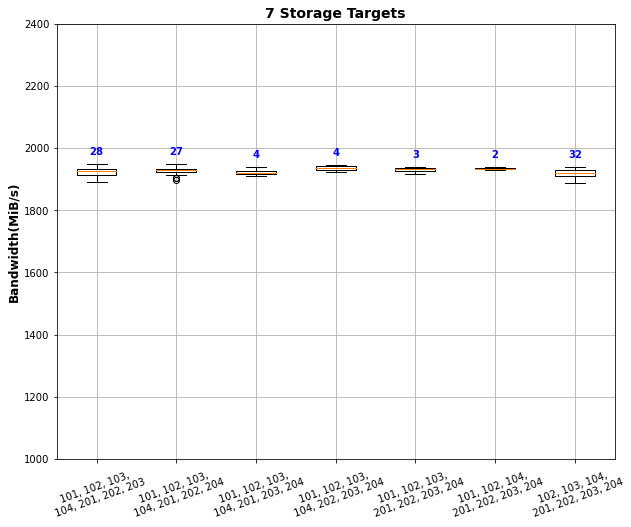

In [12]:
n_targets = 7


xlabels = ['101, 102, 103,\n 104, 201, 202, 203',
           '101, 102, 103,\n 104, 201, 202, 204',
           '101, 102, 103,\n 104, 201, 203, 204',
           '101, 102, 103,\n 104, 202, 203, 204',
           '101, 102, 103,\n 201, 202, 203, 204',
           '101, 102, 104,\n 201, 202, 203, 204',
           '102, 103, 104,\n 201, 202, 203, 204']

dframes = [df0, df1, df2, df3, df4, df5, df6]

cmm.boxplot(xlabels=xlabels, values=[d['bw'].values for d in dframes], 
            title=f"{n_targets} Storage Targets",
            ylabel='Bandwidth(MiB/s)',
            xlabel='',
            save_to=f'../graphs/boxplot/{n_targets}_boxplot.pdf',
            ylim=[1000,2400],
            rotation_x=20.0,
            dframes=dframes,
           plot_obs=True)


In [11]:
# fig, ax = plt.subplots()

# fig.set_size_inches(35.0, 8, forward=True)

# plt.plot(x, y, '-', alpha=0.3)

# plt.xticks(range(0, 13600, 100))
# plt.xticks(rotation=-90)

# plt.ylabel('Bandwidth(MiB/s)',fontweight ='bold', fontsize=16)
# plt.xlabel('Timestamp (seconds)', fontweight ='bold', fontsize=16)
# plt.title(f"Temporal Behaviour of I/O Using {n_targets} Storage Targets", fontweight ='bold', fontsize=24)

# plt.ylim([0, 2300])


# plt.scatter(df0['ctime'].values.reshape((-1, 1)), df0['bw'].values.reshape((-1, 1)), 
#             color='red', label='101, 102, 103, 104, 201, 202 and 203')
# plt.scatter(df1['ctime'].values.reshape((-1, 1)), df1['bw'].values.reshape((-1, 1)), 
#              color='purple', label='101, 102, 103, 104, 201, 202 and 204')
# plt.scatter(df2['ctime'].values.reshape((-1, 1)), df2['bw'].values.reshape((-1, 1)), 
#              color='green', label='101, 102, 103, 104, 201, 203 and 204')
# plt.scatter(df3['ctime'].values.reshape((-1, 1)), df3['bw'].values.reshape((-1, 1)), 
#              color='black', label='101, 102, 103, 104, 202, 203 and 204')
# plt.scatter(df4['ctime'].values.reshape((-1, 1)), df4['bw'].values.reshape((-1, 1)), 
#              color='yellow', label='101, 102, 103, 201, 202, 203 and 204')

# plt.scatter(df5['ctime'].values.reshape((-1, 1)), df5['bw'].values.reshape((-1, 1)), 
#              color='gray', label='101, 102, 104, 201, 202, 203 and 204')

# plt.scatter(df6['ctime'].values.reshape((-1, 1)), df6['bw'].values.reshape((-1, 1)), 
#              color='orange', label='102, 103, 104, 201, 202, 203 and 204')



# plt.legend(fontsize=16)
# # plt.grid()
# fig.savefig('../graph/7st.pdf', format='pdf', dpi=1200)  

# plt.show()